In [1]:
import pandas as pd

# Read in each csv file
double check variable types and ranges look good

In [2]:
df_2020 = pd.read_csv("csv_data/merged/Spring2020Merged_goodRuns.csv")
df_2023 = pd.read_csv("csv_data/merged/Spring2023Merged_goodRuns.csv")
df_2025 = pd.read_csv("csv_data/merged/Spring2025Merged_goodRuns.csv")

/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_82487/1971075393.py:1: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv("csv_data/merged/Spring2020Merged_goodRuns.csv")
/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_82487/1971075393.py:2: DtypeWarning: Columns (32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("csv_data/merged/Spring2023Merged_goodRuns.csv")
/var/folders/tp/y19c81b92lsc5dbbpwb5b0wh0000gn/T/ipykernel_82487/1971075393.py:3: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025 = pd.read_csv("csv_data/merged/Spring2025Merged_goodRuns.csv")


The beam up time is really only important for dealing with the correlations
Only take runs with no nudges to reduce data footprint and increase speed. 

In [3]:
print(df_2020.columns)

Index(['Date-Time', 'RunNumber', 'DAQ:STATUS', 'CBREM:PLANE', 'GONI:ROLL',
       'GONI:ROLL.RBV', 'GONI:X', 'GONI:X.RBV', 'GONI:Y', 'GONI:Y.RBV',
       'GONI:PITCH', 'GONI:PITCH.RBV', 'GONI:YAW', 'GONI:YAW.RBV', 'AC:X',
       'AC:Y', 'EBEAM:CURRENT', 'EBEAM:ENERGY', 'EBEAM:X', 'EBEAM:Y',
       'CBREM:SET_ENERGY', 'CBREM:ENERGY_UNC', 'CBREM:ENERGY', 'RADIATOR:ID',
       'RADIATOR:NAME', 'goodRun', 'TimeStamp', 'RunHasNudge',
       'NudgeDuringRun', 'NudgeOccurred', 'TotalNudgeSize_thisRun',
       'NudgeSequence', 'NudgeSequenceReduced_Correct',
       'NudgeSequenceReduced_Naive', 'TotalNudges_thisRun',
       'RunHasAbnormalNudge', 'RunHasBacklash', 'ConfigChange_inProgress',
       'BacklashNudge', 'NudgeNumber', 'NudgePitchSize', 'NudgeYawSize',
       'PitchMotionSize', 'YawMotionSize', 'MotionDone', 'NudgeEnSize_10s',
       'CBREM:ENERGY_LAG_ADJUSTED'],
      dtype='object')


In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_nudge_by_type(df,runperiod):
    abnormal_nudges = df[df['RunHasAbnormalNudge']]['RunNumber'].unique()
    print("Number of abnormal nudge runs:",len(abnormal_nudges))

    no_nudge_runs = df[~df['RunHasNudge']]['RunNumber'].unique()
    one_nudge_runs = df[(df['RunHasNudge'])&(df['TotalNudges_thisRun']==1)]['RunNumber'].unique()
    multi_nudge_runs = df[(df['RunHasNudge'])&(df['TotalNudges_thisRun']>1)]['RunNumber'].unique()
    backlash_runs = df[df['RunHasBacklash']]['RunNumber'].unique()
    total_runs = df['RunNumber'].unique()

    xticks = [0, 1, 2, 3]
    yvals = [len(no_nudge_runs)/len(total_runs)*100.0, len(one_nudge_runs)/len(total_runs)*100.0, len(multi_nudge_runs)/len(total_runs)*100.0, len(backlash_runs)/len(total_runs)*100.0]


    xtick_labels = ["No Nudge","1 Nudge",">1 Nudge","Backlash"]

    fig, ax = plt.subplots()
    plt.bar(xticks,yvals)
    plt.xlabel('Nudge Types')
    plt.ylabel('Percentage of Runs')
    plt.title('Spring '+runperiod+': Number of Runs for Each Nudge Class')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    plt.savefig('plots/runs_per_class_'+runperiod+'.pdf')

Number of abnormal nudge runs: 190


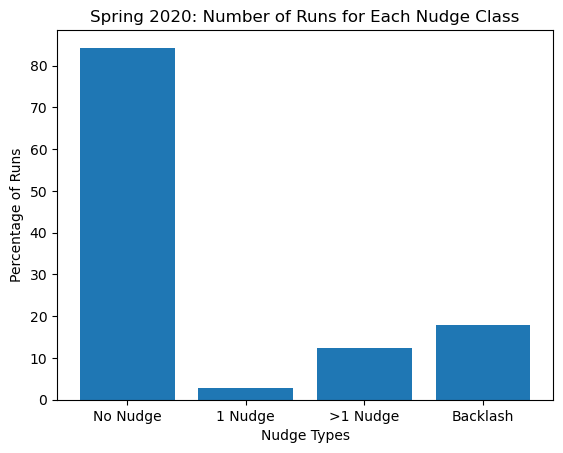

In [31]:
plot_nudge_by_type(df_2020,'2020')

Number of abnormal nudge runs: 129


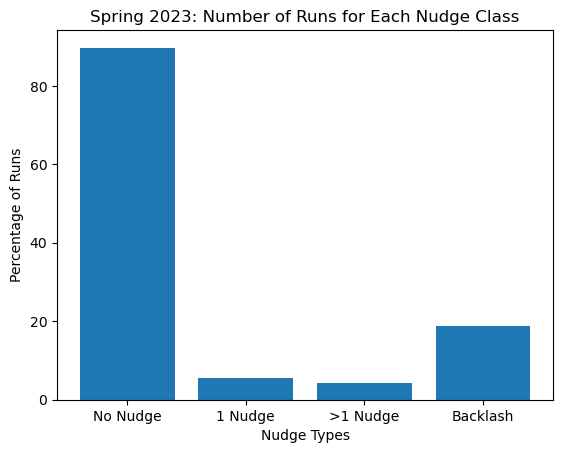

In [32]:
plot_nudge_by_type(df_2023,'2023')

Number of abnormal nudge runs: 117


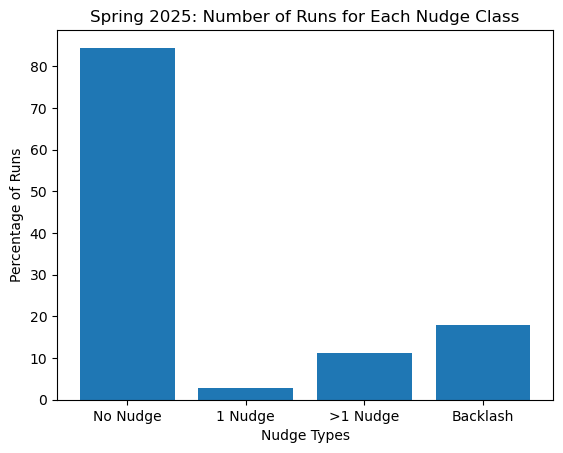

In [33]:
plot_nudge_by_type(df_2025,'2025')

In [8]:
# we are adding beam up time to runs with no nudges, which is best for looking at beam correlations
def simplify_df(df_in):
    df_no_nudge = df_in[(~df_in['RunHasNudge'])&(df_in['goodRun'])]
    # remove nudge related variables, since these runs have no nudges
    df_simple = df_no_nudge[['Date-Time', 'RunNumber', 'DAQ:STATUS', 'CBREM:PLANE',
       'GONI:ROLL', 'GONI:ROLL.RBV', 'GONI:X', 'GONI:X.RBV', 'GONI:Y',
       'GONI:Y.RBV', 'GONI:PITCH', 'GONI:PITCH.RBV', 'GONI:YAW',
       'GONI:YAW.RBV', 'AC:X', 'AC:Y', 'EBEAM:CURRENT', 'EBEAM:ENERGY',
       'EBEAM:X', 'EBEAM:Y', 'CBREM:SET_ENERGY', 'CBREM:ENERGY_UNC',
       'CBREM:ENERGY', 'RADIATOR:ID', 'RADIATOR:NAME', 'TimeStamp','MotionDone','CBREM:ENERGY_LAG_ADJUSTED']]
    return df_simple


In [9]:
df_2020_simple = simplify_df(df_2020)

In [10]:
df_2023_simple = simplify_df(df_2023)

In [11]:
df_2025['CBREM:SET_ENERGY'] = 8.9
df_2025_simple = simplify_df(df_2025)

In [12]:
def add_beam_up(df_in):
    df_out = df_in.copy()
    df_out.reset_index()
    # iterate over all rows in dataframe. Add value for BeamUpTime
    df_out['BeamUpTime'] = 0

    #df_out = pd.DataFrame()

    beam_down_time = -100
    for index, row in df_out.iterrows():

        # get current beam current (nA) and time
        current_beam_current = row['EBEAM:CURRENT']
        current_time = row['TimeStamp']

        # if beam current less than 30 nA, beam is down
        if current_beam_current<30:
            beam_down_time = current_time 

        # if beam_down_time = -100, this will be a very big positive number
        # if beam_down_time is defined, this will be seconds since beam was last down
        df_out.at[index,'BeamUpTime'] = current_time-beam_down_time

        row['BeamUpTime'] = current_time - beam_down_time
        if index%1000==0:
            print(index/len(df_out)*100.0,"%")
    return df_out
    

In [13]:
df_2025_simple_complete = add_beam_up(df_2025_simple)

0.47662826808115816 %
0.5295869645346202 %
0.5825456609880821 %
0.6355043574415442 %
1.0591739290692403 %
1.1121326255227022 %
1.1650913219761643 %
1.2180500184296263 %
1.2710087148830884 %
1.4298848042434744 %
1.4828435006969365 %
1.5358021971503983 %
1.5887608936038604 %
1.6417195900573227 %
1.6946782865107843 %
1.7476369829642464 %
1.8005956794177085 %
1.8535543758711706 %
1.9065130723246326 %
1.9594717687780945 %
2.0124304652315566 %
2.0653891616850184 %
2.1183478581384807 %
2.171306554591943 %
2.2242652510454044 %
2.2772239474988667 %
2.3301826439523285 %
2.383141340405791 %
2.806810912033487 %
2.859769608486949 %
2.912728304940411 %
2.965687001393873 %
3.018645697847335 %
3.0716043943007967 %
3.124563090754259 %
3.177521787207721 %
3.2304804836611827 %
3.2834391801146454 %
3.336397876568107 %
3.3893565730215687 %
3.918943537556189 %
3.9719022340096513 %
4.024860930463113 %
4.077819626916575 %
4.130778323370037 %
4.183737019823499 %
4.236695716276961 %
4.289654412730423 %
4.342613

In [14]:
df_2023_simple_complete = add_beam_up(df_2023_simple)

0.0 %
0.03647683392754096 %
0.07295366785508192 %
0.10943050178262288 %
0.14590733571016384 %
0.1823841696377048 %
0.21886100356524577 %
0.2553378374927867 %
0.2918146714203277 %
0.3282915053478686 %
0.3647683392754096 %
0.40124517320295056 %
0.43772200713049153 %
0.4741988410580325 %
0.5106756749855734 %
0.5471525089131144 %
0.5836293428406554 %
0.6201061767681963 %
0.6565830106957372 %
0.6930598446232782 %
0.7295366785508192 %
0.7660135124783601 %
0.8024903464059011 %
0.8389671803334421 %
0.8754440142609831 %
0.911920848188524 %
0.948397682116065 %
0.9848745160436059 %
1.0213513499711468 %
1.0578281838986878 %
1.0943050178262288 %
1.1307818517537698 %
1.1672586856813107 %
1.2037355196088517 %
1.2402123535363927 %
1.2766891874639335 %
1.3131660213914744 %
1.3496428553190154 %
1.3861196892465564 %
1.4225965231740973 %
1.4590733571016383 %
1.4955501910291793 %
1.5320270249567203 %
1.5685038588842612 %
1.6049806928118022 %
1.6414575267393432 %
1.6779343606668842 %
1.714411194594425 %
1.7

In [15]:
df_2020_simple_complete = add_beam_up(df_2020_simple)

0.0 %
0.04870711825308998 %
0.09741423650617996 %
0.14612135475926993 %
0.19482847301235992 %
0.2435355912654499 %
0.5844854190370797 %
0.6331925372901698 %
0.6818996555432597 %
0.7306067737963498 %
0.7793138920494397 %
0.8280210103025296 %
0.8767281285556197 %
1.2663850745803396 %
1.3150921928334294 %
2.045698966629779 %
2.0944060848828694 %
2.143113203135959 %
2.191820321389049 %
2.2405274396421393 %
2.289234557895229 %
2.337941676148319 %
2.6788915039199486 %
2.727598622173039 %
2.7763057404261287 %
2.825012858679219 %
2.8737199769323087 %
2.922427095185399 %
2.971134213438489 %
3.3607911594632083 %
3.409498277716298 %
3.458205395969389 %
3.5069125142224786 %
3.5556196324755684 %
4.188812169765739 %
4.237519288018828 %
4.481054879284279 %
4.529761997537368 %
4.578469115790458 %
4.627176234043548 %
4.675883352296638 %
4.724590470549728 %
4.773297588802818 %
4.822004707055908 %
4.870711825308998 %
4.919418943562088 %
4.968126061815178 %
5.016833180068268 %
5.406490126092988 %
5.455197

In [16]:
df_2020_simple_complete['BeamUpTime'].describe()

count    2.053088e+06
mean     5.536934e+01
std      1.102700e+03
min     -3.949100e+04
25%      1.400000e+01
50%      9.600000e+01
75%      2.500000e+02
max      1.101500e+04
Name: BeamUpTime, dtype: float64

In [17]:
df_2023_simple_complete['BeamUpTime'].describe()

count    2.741466e+06
mean    -1.331822e+01
std      3.131811e+03
min     -2.241550e+05
25%      0.000000e+00
50%      6.100000e+01
75%      2.060000e+02
max      6.677000e+03
Name: BeamUpTime, dtype: float64

In [18]:
df_2025_simple_complete['BeamUpTime'].describe()

count    1.888264e+06
mean     8.496310e+01
std      1.809193e+03
min     -1.410430e+05
25%      0.000000e+00
50%      1.050000e+02
75%      4.060000e+02
max      7.376000e+03
Name: BeamUpTime, dtype: float64

In [19]:
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def plot_up_time(df_in,runperiod):
    bins = np.arange(1,500,1)
    plt.hist(df_in['BeamUpTime'],bins=bins)
    plt.title('Beam Up Time For Spring '+runperiod)
    plt.xlabel('Beam Up Time (s)')
    plt.savefig('plots/beam_up_'+runperiod+'.pdf')

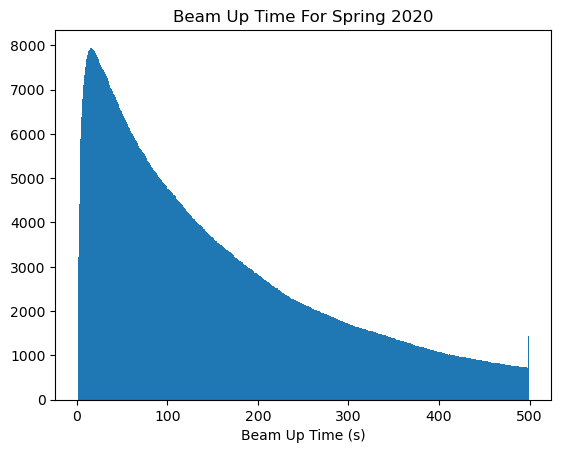

In [20]:
plot_up_time(df_2020_simple_complete,'2020')

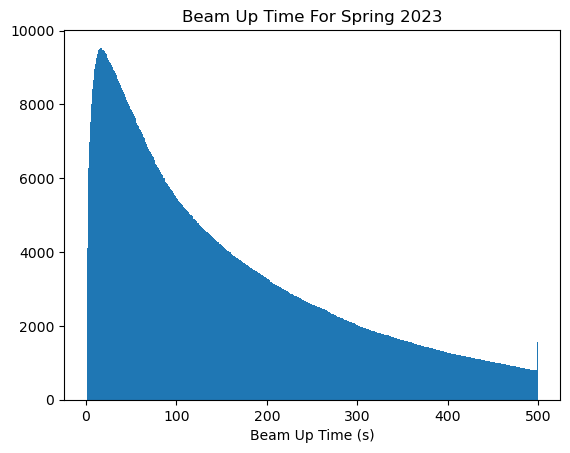

In [21]:
plot_up_time(df_2023_simple_complete,'2023')

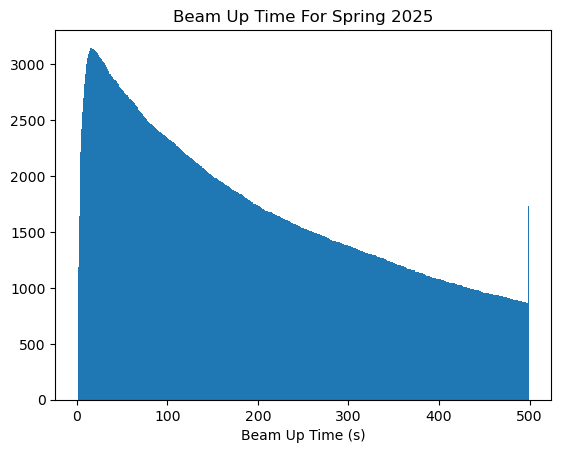

In [22]:
plot_up_time(df_2025_simple_complete,'2025')

In [34]:
# look at diff in CBREM:ENERGY for each second. See how long it takes to see updated energy after beam down

def plot_deltaE_vs_up_time(df_in,runperiod):
    df_in['CBREM:EN_DIFF'] = df_in['CBREM:ENERGY'].diff()
    df_viz = df_in[(abs(df_in['CBREM:EN_DIFF'])>0.05)]
    plt.scatter(df_viz['BeamUpTime'],df_viz['CBREM:EN_DIFF'],alpha=0.1,rasterized=True)
    plt.xlabel('Time Since Beam Down (s)')
    plt.ylabel('Change in Energy (MeV)')
    plt.xlim(0,10)
    plt.ylim(-100,100)
    plt.title('Spring '+runperiod+': Energy Change vs. Time Since Beam Down')
    plt.savefig('plots/deltaE_vs_beamDownTime_'+runperiod+'.pdf')

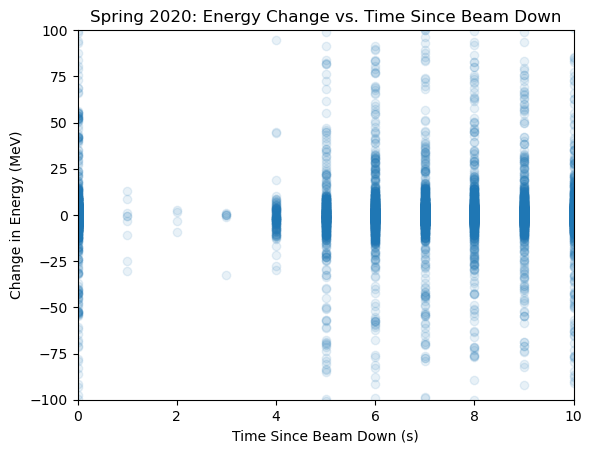

In [35]:
plot_deltaE_vs_up_time(df_2020_simple_complete,'2020')

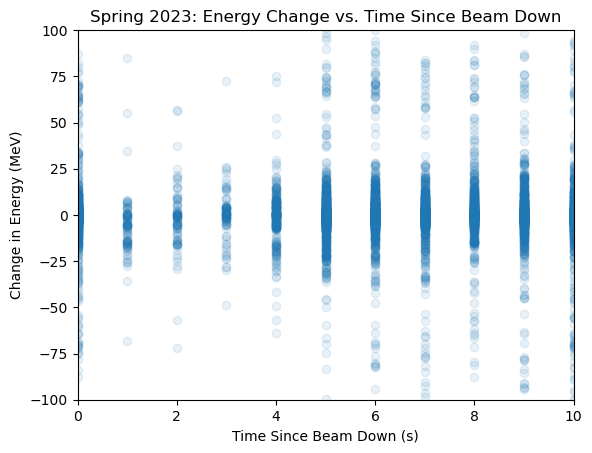

In [36]:
plot_deltaE_vs_up_time(df_2023_simple_complete,'2023')

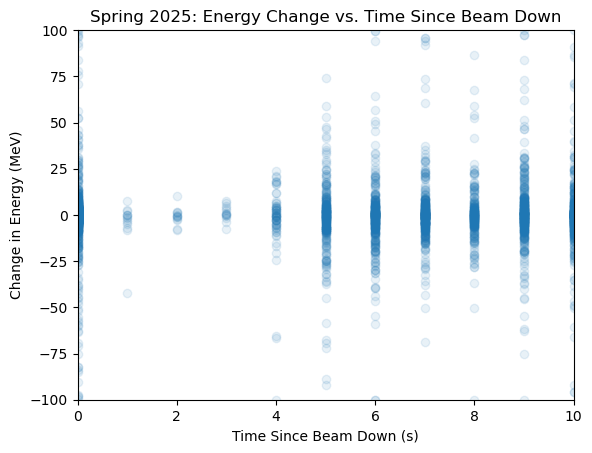

In [37]:
plot_deltaE_vs_up_time(df_2025_simple_complete,'2025')

In [27]:
df_2020_simple_complete.to_csv("csv_data/merged/Spring2020_with_up_time.csv")

In [28]:
df_2023_simple_complete.to_csv("csv_data/merged/Spring2023_with_up_time.csv")

In [29]:
df_2025_simple_complete.to_csv("csv_data/merged/Spring2025_with_up_time.csv")